In [1]:
!pwd

/Users/ashish1610dhiman/data_projects/fall22_hw/RoboChef/notebooks/recommendation


In [3]:
!ls

zsh:1: command not found: ls


In [68]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

### Read data

In [5]:
raw_interactions = pd.read_csv("../../data/recommendation/RAW_interactions.csv")
raw_recipes = pd.read_csv("../../data/recommendation/RAW_recipes.csv")

interaction_train = pd.read_csv("../../data/recommendation/interactions_train.csv")
interaction_validation = pd.read_csv("../../data/recommendation/interactions_validation.csv")

In [6]:
raw_interactions.shape,raw_recipes.shape

((1132367, 5), (231637, 12))

### EDA raw_interactions

In [7]:
raw_interactions.columns

Index(['user_id', 'recipe_id', 'date', 'rating', 'review'], dtype='object')

In [37]:
raw_interactions.head(5)

,user_id,recipe_id,date,rating,review,user_recipe
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...,38094_40893
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall...",1293707_40893
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...,8937_44394
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...,126440_85009
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin...",57222_85009


In [42]:
raw_interactions["date1"]=pd.to_datetime(raw_interactions["date"])

In [39]:
raw_interactions.dtypes

user_id         int64
recipe_id       int64
date           object
rating          int64
review         object
user_recipe    object
dtype: object

In [12]:
raw_interactions[["user_id","recipe_id"]].nunique()

user_id      226570
recipe_id    231637
dtype: int64

In [26]:
raw_interactions["user_recipe"]=raw_interactions["user_id"].astype(str)+"_"+raw_interactions["recipe_id"].astype(str)
raw_interactions[["user_id","recipe_id","user_recipe"]].nunique()

user_id         226570
recipe_id       231637
user_recipe    1132367
dtype: int64

In [28]:
(226570*231637)/1132367

46347.160496552795

In [33]:
raw_interactions[["date","rating"]].describe()

,rating
count,1.132367e+06
mean,4.411016e+00
std,1.264752e+00
min,0.000000e+00
25%,4.000000e+00
50%,5.000000e+00
75%,5.000000e+00
max,5.000000e+00


<AxesSubplot: >

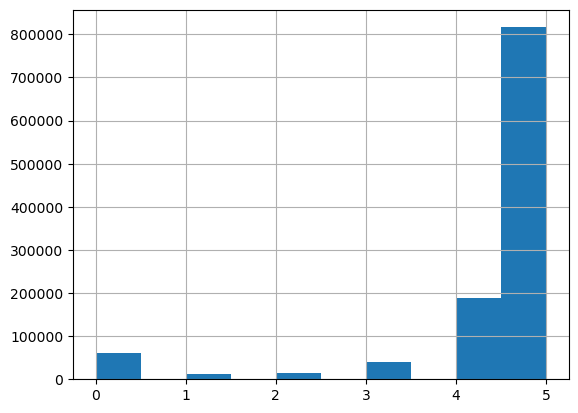

In [36]:
raw_interactions["rating"].hist()

In [44]:
user_grp = raw_interactions.groupby("user_id").agg({"recipe_id":"count",\
                                                   "rating":"mean",\
                                                   "date1":["max","min"]})
user_grp.head()

recipe_id    rating      date1           
            count      mean        max        min
user_id                                          
1533          128  4.710938 2008-03-01 2002-02-19
1535          794  4.473552 2018-03-03 2004-05-22
1581            1  5.000000 2013-11-11 2013-11-11
1634           60  3.616667 2011-03-09 2001-07-02
1676           31  4.677419 2014-07-09 2002-07-24

In [47]:
user_grp.columns

MultiIndex([('recipe_id', 'count'),
            (   'rating',  'mean'),
            (    'date1',   'max'),
            (    'date1',   'min')],
           )

In [54]:
delta = user_grp[('date1','max')]-user_grp[('date1','min')]
user_grp[('date1','range')]=delta.apply(lambda x: x.days)

In [55]:
user_grp.describe()

,recipe_id,rating,date1
,count,mean,range
count,226570.000000,226570.000000,226570.000000
mean,4.997868,3.873031,221.442459
std,49.663111,1.773173,639.401277
min,1.000000,0.000000,0.000000
25%,1.000000,3.800000,0.000000
50%,1.000000,5.000000,0.000000
75%,2.000000,5.000000,0.000000
max,7671.000000,5.000000,6432.000000


In [57]:
(user_grp[("recipe_id","count")]<=1).mean()

0.7337952950523017

In [60]:
(user_grp[("recipe_id","count")]<=2).mean()

0.8341528004590193

In [61]:
(user_grp[("recipe_id","count")]<=5).mean()

0.9132056318135675

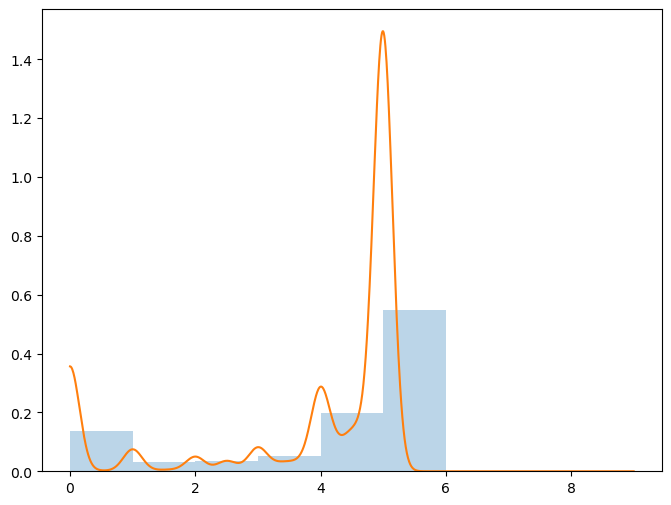

In [69]:
bins = np.arange(10)

x=user_grp[("rating","mean")]

kde = stats.gaussian_kde(x)
xx = np.linspace(0, 9, 1000)
fig, ax = plt.subplots(figsize=(8,6))
ax.hist(x, density=True, bins=bins, alpha=0.3)
ax.plot(xx, kde(xx))

Key points:
1. Number of unique users =
2. Number of unique recipes =
3. Number of unique users, recipees = | Not every user rates every recipe
4. #recipes a user reviews on average = 4.99, Highly left skewed
    - 73% users rate only one recipe
    - 84% users rate <= 2
    - 91% users rate <= 5
5. average rating a user gives = 3.87